In [1]:
#8
!python han-font.py
exec(open('han-font.py').read())

import numpy as np
import pandas as pd
desa=pd.read_csv("대사중후군.csv", encoding='CP949')

In [2]:
ex1ex2=desa.ex1ex2co[(desa.ex1ex2co ==1) | (desa.ex1ex2co == 2)]
bmi1=desa.bmi1[(desa.ex1ex2co ==1) | (desa.ex1ex2co == 2)]
bmi2=desa.bmi2[(desa.ex1ex2co ==1) | (desa.ex1ex2co == 2)]
bmi3=bmi1-bmi2
d={'ex1ex2':ex1ex2,  'pre_bmi':bmi1, 'post_bmi':bmi2, 'bmi감소량':bmi3}
data=pd.DataFrame(data=d)
data.head()

,ex1ex2,pre_bmi,post_bmi,bmi감소량
1,2,22.7,21.1,1.6
3,2,27.6,27.4,0.2
5,2,26.9,26.0,0.9
6,1,33.0,30.7,2.3
7,2,31.0,34.1,-3.1


In [3]:
#실험군 1,2 통합
data.loc[(data.ex1ex2 ==1) | (data.ex1ex2 == 2), "실험군"] = '1' 
data.head(3)

,ex1ex2,pre_bmi,post_bmi,bmi감소량,실험군
1,2,22.7,21.1,1.6,1
3,2,27.6,27.4,0.2,1
5,2,26.9,26.0,0.9,1


In [4]:
data.bmi감소량.describe().round(3) # bmi감소량=bmi1-bmi2, bmi감소량의 평균:0.95
                                   # bmi감소량의 표준편차:2.23

count    71.000
mean      0.955
std       2.230
min      -9.600
25%       0.200
50%       0.900
75%       1.550
max      13.400
Name: bmi감소량, dtype: float64

In [5]:
#8-1대응표본 검정-단측검정
#8-1대응표본 검정-단측검정
from scipy.stats import ttest_rel
tval=ttest_rel(bmi1, bmi2)[0] 
pval=ttest_rel(bmi1, bmi2)[1]/2
print("T-value=%.3f, P-value=%.3f" %(tval, pval))#귀무가설 기각

T-value=3.608, P-value=0.000


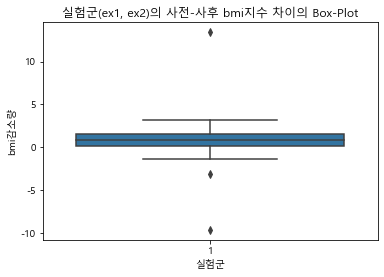

In [6]:
#8-2 상자도표
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='실험군', y='bmi감소량', data=data)
plt.title("실험군(ex1, ex2)의 사전-사후 bmi지수 차이의 Box-Plot")
plt.show()

In [7]:
#9
import pandas as pd
desa=pd.read_csv("대사중후군.csv", encoding='CP949')
group=desa.group
삶의질=desa.삶의질
d={'group':group, '삶의질':삶의질}
data1=pd.DataFrame(data=d)
data1.head()

,group,삶의질
0,3,37.99
1,2,34.04
2,3,61.56
3,2,54.24
4,3,61.92


In [8]:
data1.groupby(group).삶의질.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
1,38.0,55.059737,20.620682,13.88,38.8925,53.19,72.005,95.38
2,33.0,53.961818,19.677531,10.19,40.1500,55.57,69.850,86.03
3,20.0,55.540500,20.062674,20.18,40.6150,53.52,66.340,95.10


In [9]:
#9-1일원배치 분산분석
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit=smf.ols('삶의질~C(group)', data1).fit()
sm.stats.anova_lm(fit, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,36.616930,18.308465,0.04504,0.955981
Residual,88.0,35771.137083,406.490194,NaN,NaN


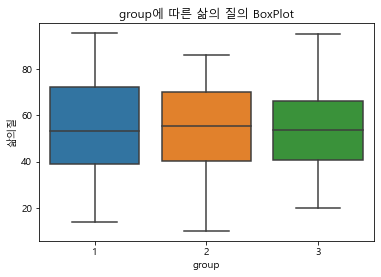

In [10]:
#9-2 상자도표
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='group', y='삶의질', data=data1)
plt.title("group에 따른 삶의 질의 BoxPlot")
plt.show()

In [11]:
#9-3 
#사후검정-Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data1.삶의질, groups=data1.group, alpha=0.05)
print(tukey) # ex1ex2의 수준은 모두 평균차이가 유의미하지않다.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -1.0979 0.9715  -12.535 10.3391  False
     1      3   0.4808 0.9959 -12.7975  13.759  False
     2      3   1.5787 0.9588  -12.042 15.1994  False
-----------------------------------------------------


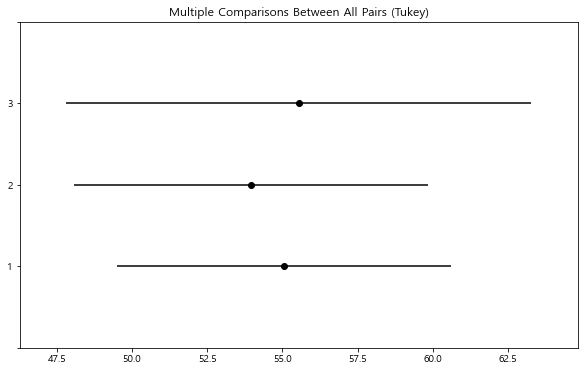

In [32]:
fig=tukey.plot_simultaneous() #마찬가지로 유의미하다고 보기 힘듬

In [25]:
desa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ex1ex2co  91 non-null     int64  
 1   exco      91 non-null     int64  
 2   site      91 non-null     int64  
 3   wc1       91 non-null     float64
 4   wc2       91 non-null     float64
 5   tg1       91 non-null     int64  
 6   tg2       91 non-null     int64  
 7   hdl1      91 non-null     int64  
 8   hdl2      91 non-null     int64  
 9   ldl1      91 non-null     int64  
 10  ldl2      91 non-null     int64  
 11  gl1       91 non-null     int64  
 12  gl2       91 non-null     int64  
 13  sbp1      91 non-null     int64  
 14  sbp2      91 non-null     int64  
 15  dsp1      91 non-null     int64  
 16  dsp2      91 non-null     int64  
 17  we1       91 non-null     float64
 18  we2       91 non-null     float64
 19  체지방1      91 non-null     float64
 20  체지방2      91 non-null     float64


In [18]:
#10
import numpy as np
import pandas as pd
desa=pd.read_csv("대사중후군.csv", encoding='CP949')

In [27]:
group=desa.group
건강=desa.건강
삶의질=desa.삶의질
d={'group':group, '건강':건강, '삶의질':삶의질}
data2=pd.DataFrame(data=d)
data2.head()

,group,건강,삶의질
0,3,5.0,37.99
1,2,3.0,34.04
2,3,2.0,61.56
3,2,NaN,54.24
4,3,NaN,61.92


In [28]:
data2.groupby(건강).삶의질.describe()

,count,mean,std,min,25%,50%,75%,max
건강,,,,,,,,
2.0,27.0,66.709630,18.974242,27.31,59.6900,68.240,78.5650,95.38
3.0,24.0,59.984583,16.651554,34.04,42.3625,59.125,71.1025,88.63
4.0,28.0,43.148214,16.005628,13.88,33.0325,41.015,50.0425,78.24
5.0,9.0,37.208889,12.235118,10.19,33.9800,39.580,41.7400,53.44


In [21]:
#10-1
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit=smf.ols('삶의질~C(group)+C(건강)', data2).fit()
sm.stats.anova_lm(fit, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,19.081049,9.540524,0.033397,9.671677e-01
C(건강),3.0,11452.553524,3817.517841,13.363365,3.496666e-07
Residual,82.0,23424.973605,285.670410,NaN,NaN


In [30]:
#10-2
#사후검정-Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey1 = pairwise_tukeyhsd(endog=data2.삶의질, groups=data2.건강, alpha=0.05)
print(tukey1)  

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   2.0    3.0   -6.725 0.6132  -19.872   6.4219  False
   2.0    4.0 -23.5614    0.0 -36.2015 -10.9214   True
   2.0    5.0 -29.5007 0.0002 -47.5383 -11.4632   True
   2.0    nan   -0.043    1.0 -28.5628  28.4769  False
   3.0    4.0 -16.8364 0.0047 -29.8724  -3.8003   True
   3.0    5.0 -22.7757 0.0072 -41.0929  -4.4585   True
   3.0    nan   6.6821 0.9664 -22.0154  35.3796  False
   4.0    5.0  -5.9393 0.8878 -23.8961  12.0175  False
   4.0    nan  23.5185 0.1543  -4.9504  51.9873  False
   5.0    nan  29.4578 0.0743  -1.7841  60.6997  False
------------------------------------------------------


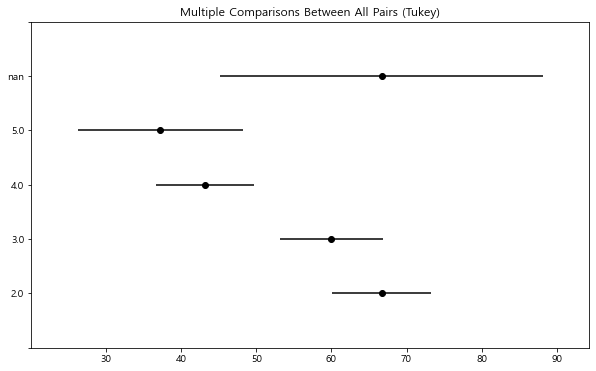

In [23]:
fig=tukey1.plot_simultaneous() 

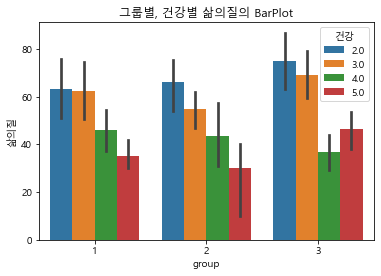

In [24]:
#11
#막대도표
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="group", y="삶의질", hue="건강", data=data2)
plt.title("그룹별, 건강별 삶의질의 BarPlot")
plt.show()

In [29]:
data2.groupby(group).삶의질.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
1,38.0,55.059737,20.620682,13.88,38.8925,53.19,72.005,95.38
2,33.0,53.961818,19.677531,10.19,40.1500,55.57,69.850,86.03
3,20.0,55.540500,20.062674,20.18,40.6150,53.52,66.340,95.10
